     Gender      1      2      3       4       5       6       7   8
0         1  0.455  0.365  0.095  0.5140  0.2245  0.1010  0.1500  15
1         1  0.350  0.265  0.090  0.2255  0.0995  0.0485  0.0700   7
2         1  0.530  0.420  0.135  0.6770  0.2565  0.1415  0.2100   9
3         1  0.440  0.365  0.125  0.5160  0.2155  0.1140  0.1550  10
4        -1  0.330  0.255  0.080  0.2050  0.0895  0.0395  0.0550   7
...     ...    ...    ...    ...     ...     ...     ...     ...  ..
4172      1  0.565  0.450  0.165  0.8870  0.3700  0.2390  0.2490  11
4173      1  0.590  0.440  0.135  0.9660  0.4390  0.2145  0.2605  10
4174      1  0.600  0.475  0.205  1.1760  0.5255  0.2875  0.3080   9
4175      1  0.625  0.485  0.150  1.0945  0.5310  0.2610  0.2960  10
4176      1  0.710  0.555  0.195  1.9485  0.9455  0.3765  0.4950  12

[4177 rows x 9 columns]
          1      2      3       4       5       6       7   8
0     0.455  0.365  0.095  0.5140  0.2245  0.1010  0.1500  15
1     0.350  0.265  0.0

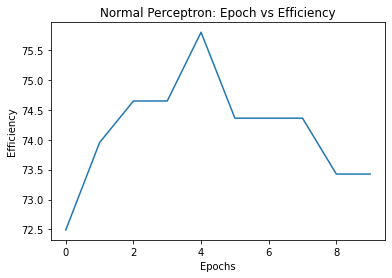

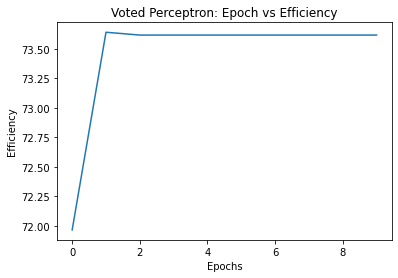

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def perceptron_normal(y,x,w,b):
    for j in range(4177):
        a=np.sign(np.dot(x.loc[[j]],w)+b)
        if y.loc[j,'Gender']*a<0:
            for i in range(len(w)):
                w[i]+=(y.loc[j,'Gender'])*(x.loc[j,i+1])
            b+=y.loc[j,'Gender']
    return w,b
def perceptron_voted(y,x,w,b):
    W=w
    for j in range(4177):
        a=np.sign(np.dot(x.loc[[j]],w)+b)
        if y.loc[j,'Gender']*a<0:
            for i in range(len(w)):
                w[i]+=(y.loc[j,'Gender'])*(x.loc[j,i+1])
            W=np.add(W,w)
            b+=y.loc[j,'Gender']
    np.multiply(W,1/4177)
    return W,b
#Reading and importing dataset
df1=pd.read_csv("abalone.txt",sep=",",header=None)
#print(df1)
df2 = df1.rename(columns={0: 'Gender'})
#print(df2)
#Changing some labels to make the data fit into signum function
for i in df2.index:
    if df2.loc[i,'Gender']=='I':
        df2.loc[i,'Gender']=-1
    else:
        df2.loc[i,'Gender']=1
print(df2)
df3=df1.drop([0], axis = 1)
print(df3)
print(df3.index)
print(df3.iloc[[2]])
w=[1,1,1,1,1,1,1,1]
print(np.sign(df3.iloc[[2]].dot(w)))
print(df2.loc[1,'Gender']*(df3.loc[1,3]))


#Running the Perceptron functions in the given dataset for learning and provide appropriate values for w and b
w1=[]
b1=[]
w=[1,1,1,1,1,1,1,1]
b=0.0
for i in range(10):
    w,b=perceptron_normal(df2,df3,w,b)
    w1.append(w)
    b1.append(b)
w2=[]
b2=[]
w=[1,1,1,1,1,1,1,1]
b=0.0
for i in range(10):
    w,b=perceptron_voted(df2,df3,w,b)
    w2.append(w)
    b2.append(b)
    
    
#Efficiency checking
#for normal perceptron
x=[]
y=[]
for i in range(10):  
    m=0
    for j in range(4177):
        a=np.sign(np.dot(df3.loc[[j]],w1[i])+b1[i])
        if df2.loc[j,'Gender']==a:
            m+=1
    k=(m/4177)*100
    x.append(i)
    y.append(k)
#for voted perceptron
X=[]
Y=[]
for i in range(10):  
    m=0
    for j in range(4177):
        a=np.sign(np.dot(df3.loc[[j]],w2[i])+b2[i])
        if df2.loc[j,'Gender']==a:
            m+=1
    k=(m/4177)*100
    X.append(i)
    Y.append(k)
# plotting epoch vs efficiency for normal perceptron
plt.plot(x, y)
plt.xlabel('Epochs')
plt.ylabel('Efficiency')
plt.title('Normal Perceptron: Epoch vs Efficiency')
plt.show()
# plotting Epoch vs efficiency for voted perceptron 
plt.plot(X, Y)
plt.xlabel('Epochs')
plt.ylabel('Efficiency')
plt.title('Voted Perceptron: Epoch vs Efficiency')
plt.show()